In [1]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
#BiocManager::install("alevinQC")
#BiocManager::available("tximport")

In [2]:
source("tximport/R/alevin.R")

In [3]:
library(Seurat)
library(tximport)
library(magrittr)
library(dplyr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
files <- file.path("GSM2230760__salmon_quant/alevin/quants_mat.gz")
gene.names <- scan("GSM2230760__salmon_quant/alevin/quants_mat_cols.txt",character())
cell.names <- scan("GSM2230760__salmon_quant/alevin/quants_mat_rows.txt",character())

In [5]:
mat <- readAlevinBits(files,gene.names,cell.names)
saveRDS(mat,'mat.rds')

In [6]:
mat <- readRDS('mat.rds')

In [7]:
annot <- read.table("gencode.v33.transcripts.ensg2symbol.tsv",
                    col.names=c("ENSG","symbol","type"),
                    stringsAsFactors=FALSE
                   )
stopifnot(rownames(mat)==annot$ENSG[annot$ENSG %in% rownames(mat)])
rownames(mat) <- annot$symbol[annot$ENSG %in% rownames(mat)]

In [8]:
cells <- CreateSeuratObject(counts = mat, min.cells=10, min.features=200, project="GSM2230758")

Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”


In [9]:
cells

An object of class Seurat 
21854 features across 15147 samples within 1 assay 
Active assay: RNA (21854 features)

In [10]:
cells <- NormalizeData(cells, normalization.method = "LogNormalize", scale.factor = 10000)

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”
When using repel, set xnudge and ynudge to 0 for optimal results



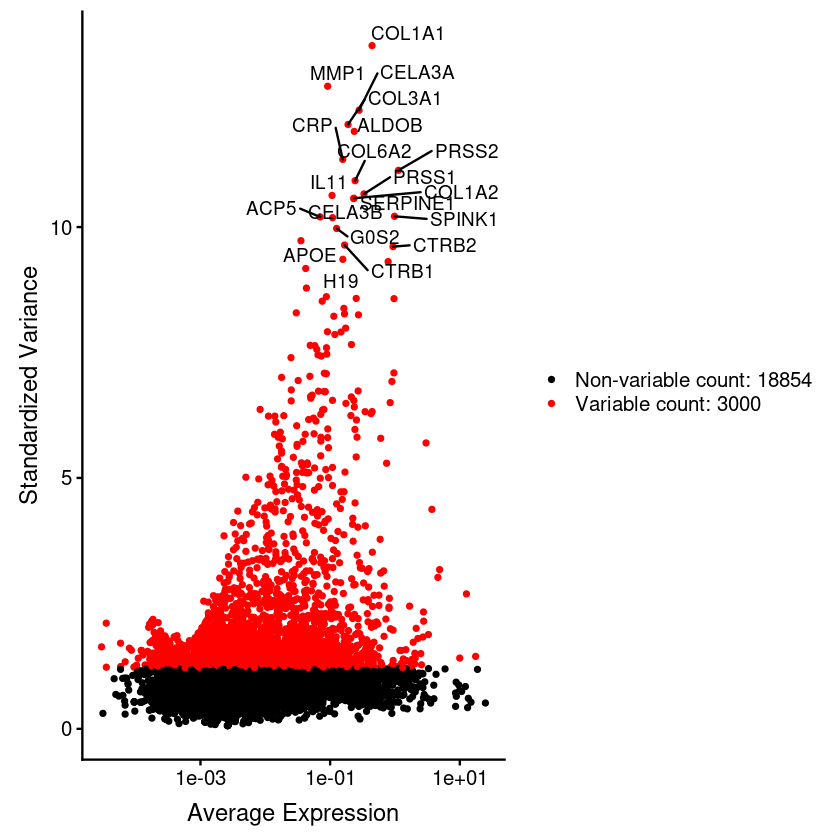

In [11]:
cells <- FindVariableFeatures(cells, selection.method = "vst", nfeatures = 3000)
topN <- head(VariableFeatures(cells), 20)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(cells)
plot2 <- LabelPoints(plot = plot1, points = topN, repel = TRUE)
plot2

In [12]:
cells <- ScaleData(cells, features = rownames(cells))

Centering and scaling data matrix



PC_ 1 
Positive:  AL078595.1, RPS27, AC006511.4, RPS25, CHST12, DUSP1, HLA-B, RPLP0, RPS3A, PTMA 
	   HELLPAR, KRT18, RPS18, RPLP1, RPL28, RPS6KA5, GAPDHP35, RPL13A, RPS8, S100A10 
	   ADAM10, FTH1, SLC35E3, RPSA, KRT8, ACER3, AC138470.1, GAPDH, MFSD4B, SEMA3E 
Negative:  IAPP, SST, INS, CDKN1C, DLK1, PPY, DEPP1, VGF, RBP4, REG1A 
	   GHRL, REG3A, PCK1, TTR, AL590283.1, RAPSN, RN7SL488P, RDM1, AC092652.1, EEF1A1P14 
	   AP000753.1, AC073571.1, PCDHGA1, LINC01903, AL353759.1, LINC00689, SCGB1A1, AL603962.1, CALCA, AP000944.1 
PC_ 2 
Positive:  AL049839.2, IFITM3, ZFP36L1, TACSTD2, PMEPA1, TM4SF1, IL32, KRT19, CFB, KRT7 
	   LCN2, SERPING1, C3, SOD2, SDC4, OLFM4, CCN1, IFITM2, SERPINA3, MMP7 
	   CD44, PDZK1IP1, ANXA4, SERPINA5, GDF15, TINAGL1, CXCL8, DUOX2, CDC42EP1, SOX4 
Negative:  PCSK1N, CHGB, EEF1A2, SYT7, HELLPAR, MALAT1, GPX3, CHST12, CFC1, AL022322.2 
	   TTR, RPS6KA5, SLC7A2, VGF, NLRP1, ACER3, SLC35E3, SERAC1, SEMA3E, MFSD4B 
	   ZNF320, ARFGEF3, PEMT, ZMAT3, AL590822.2, CD226

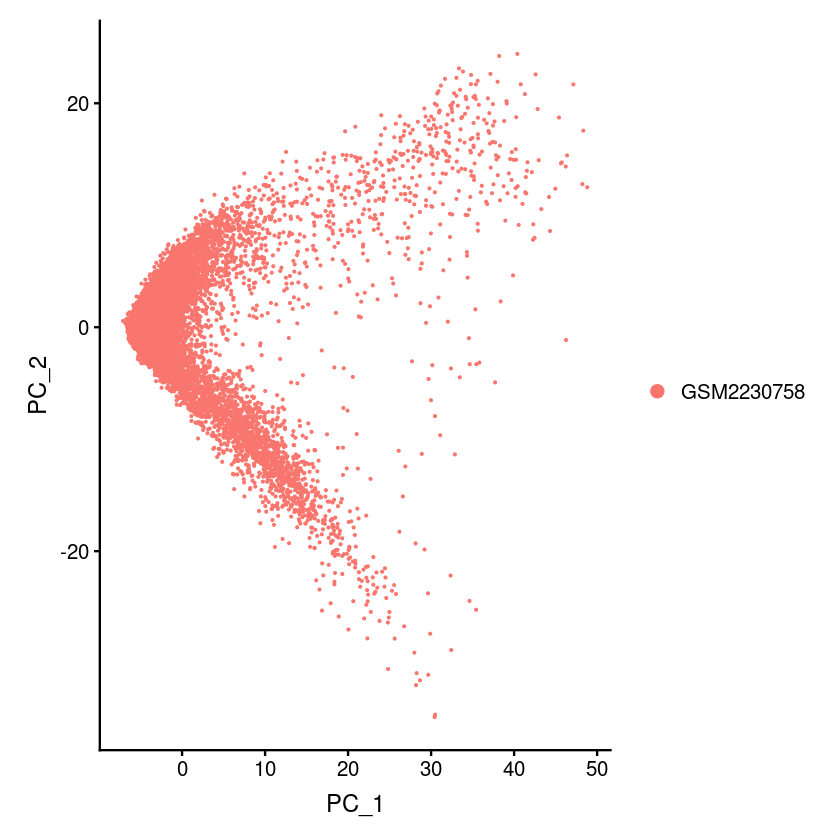

In [13]:
cells <- RunPCA(cells)
DimPlot(cells, reduction="pca")

In [14]:
cells <- FindNeighbors(cells, dims = 1:10)
cells <- FindClusters(cells, resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 15147
Number of edges: 461190

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8734
Number of communities: 13
Elapsed time: 2 seconds


In [15]:
cells <- RunUMAP(cells, dims = 1:10)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
12:38:29 UMAP embedding parameters a = 0.9922 b = 1.112

12:38:29 Read 15147 rows and found 10 numeric columns

12:38:29 Using Annoy for neighbor search, n_neighbors = 30

12:38:29 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

12:38:32 Writing NN index file to temp file /scratch/17019.1.ood/Rtmpm7A78u/file7ed073981b33

12:38:32 Searching Annoy index using 1 thread, search_k = 3000

12:38:38 Annoy recall = 100%

12:38:41 Commencing smooth kNN distance calibration using 1 thread

12:38:4

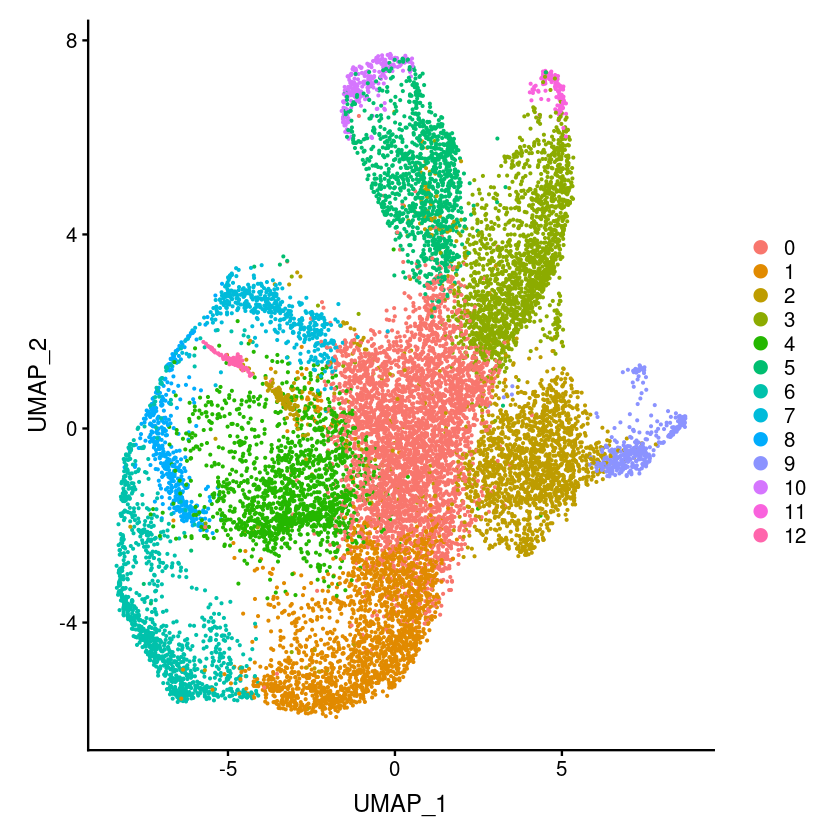

In [16]:
DimPlot(cells, reduction = "umap")

In [17]:
saveRDS(cells,'GSM2230760_seurat.rda')

## Marker genes

In [18]:
cell.markers <- FindAllMarkers(cells, only.pos=TRUE, min.pct=0.25, logfc.threshold=0.25, return.thresh=0.1)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12



In [19]:
markers <- cell.markers %>% group_by(cluster) %>% top_n(n=1000, wt=avg_logFC)

In [20]:
#heatmap.markers <- cell.markers %>% group_by(cluster) %>% top_n(n=5, wt=avg_logFC)
#DoHeatmap(cells, features = markers$gene)

In [21]:
options(repr.matrix.max.rows=100)
#markers %>% filter(cluster==3) %>% ungroup() %>% select(gene)
write.csv(markers, "GSM2230760_marker_genes.csv", row.names=FALSE)